In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

# LOAD DF

In [2]:
new_df_with_medical_history = pd.read_csv('new_df_with_medical_history.csv', encoding='utf-8').drop(columns = 'Unnamed: 0')

In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def corr_heatmap(data_frame, size=11):
  correlation = data_frame.corr()
  fig, heatmap = plt.subplots(figsize=(size, size))
  heatmap.matshow(correlation)
  plt.xticks(range(len(correlation.columns)), correlation.columns)
  plt.yticks(range(len(correlation.columns)), correlation.columns)
  plt.show()


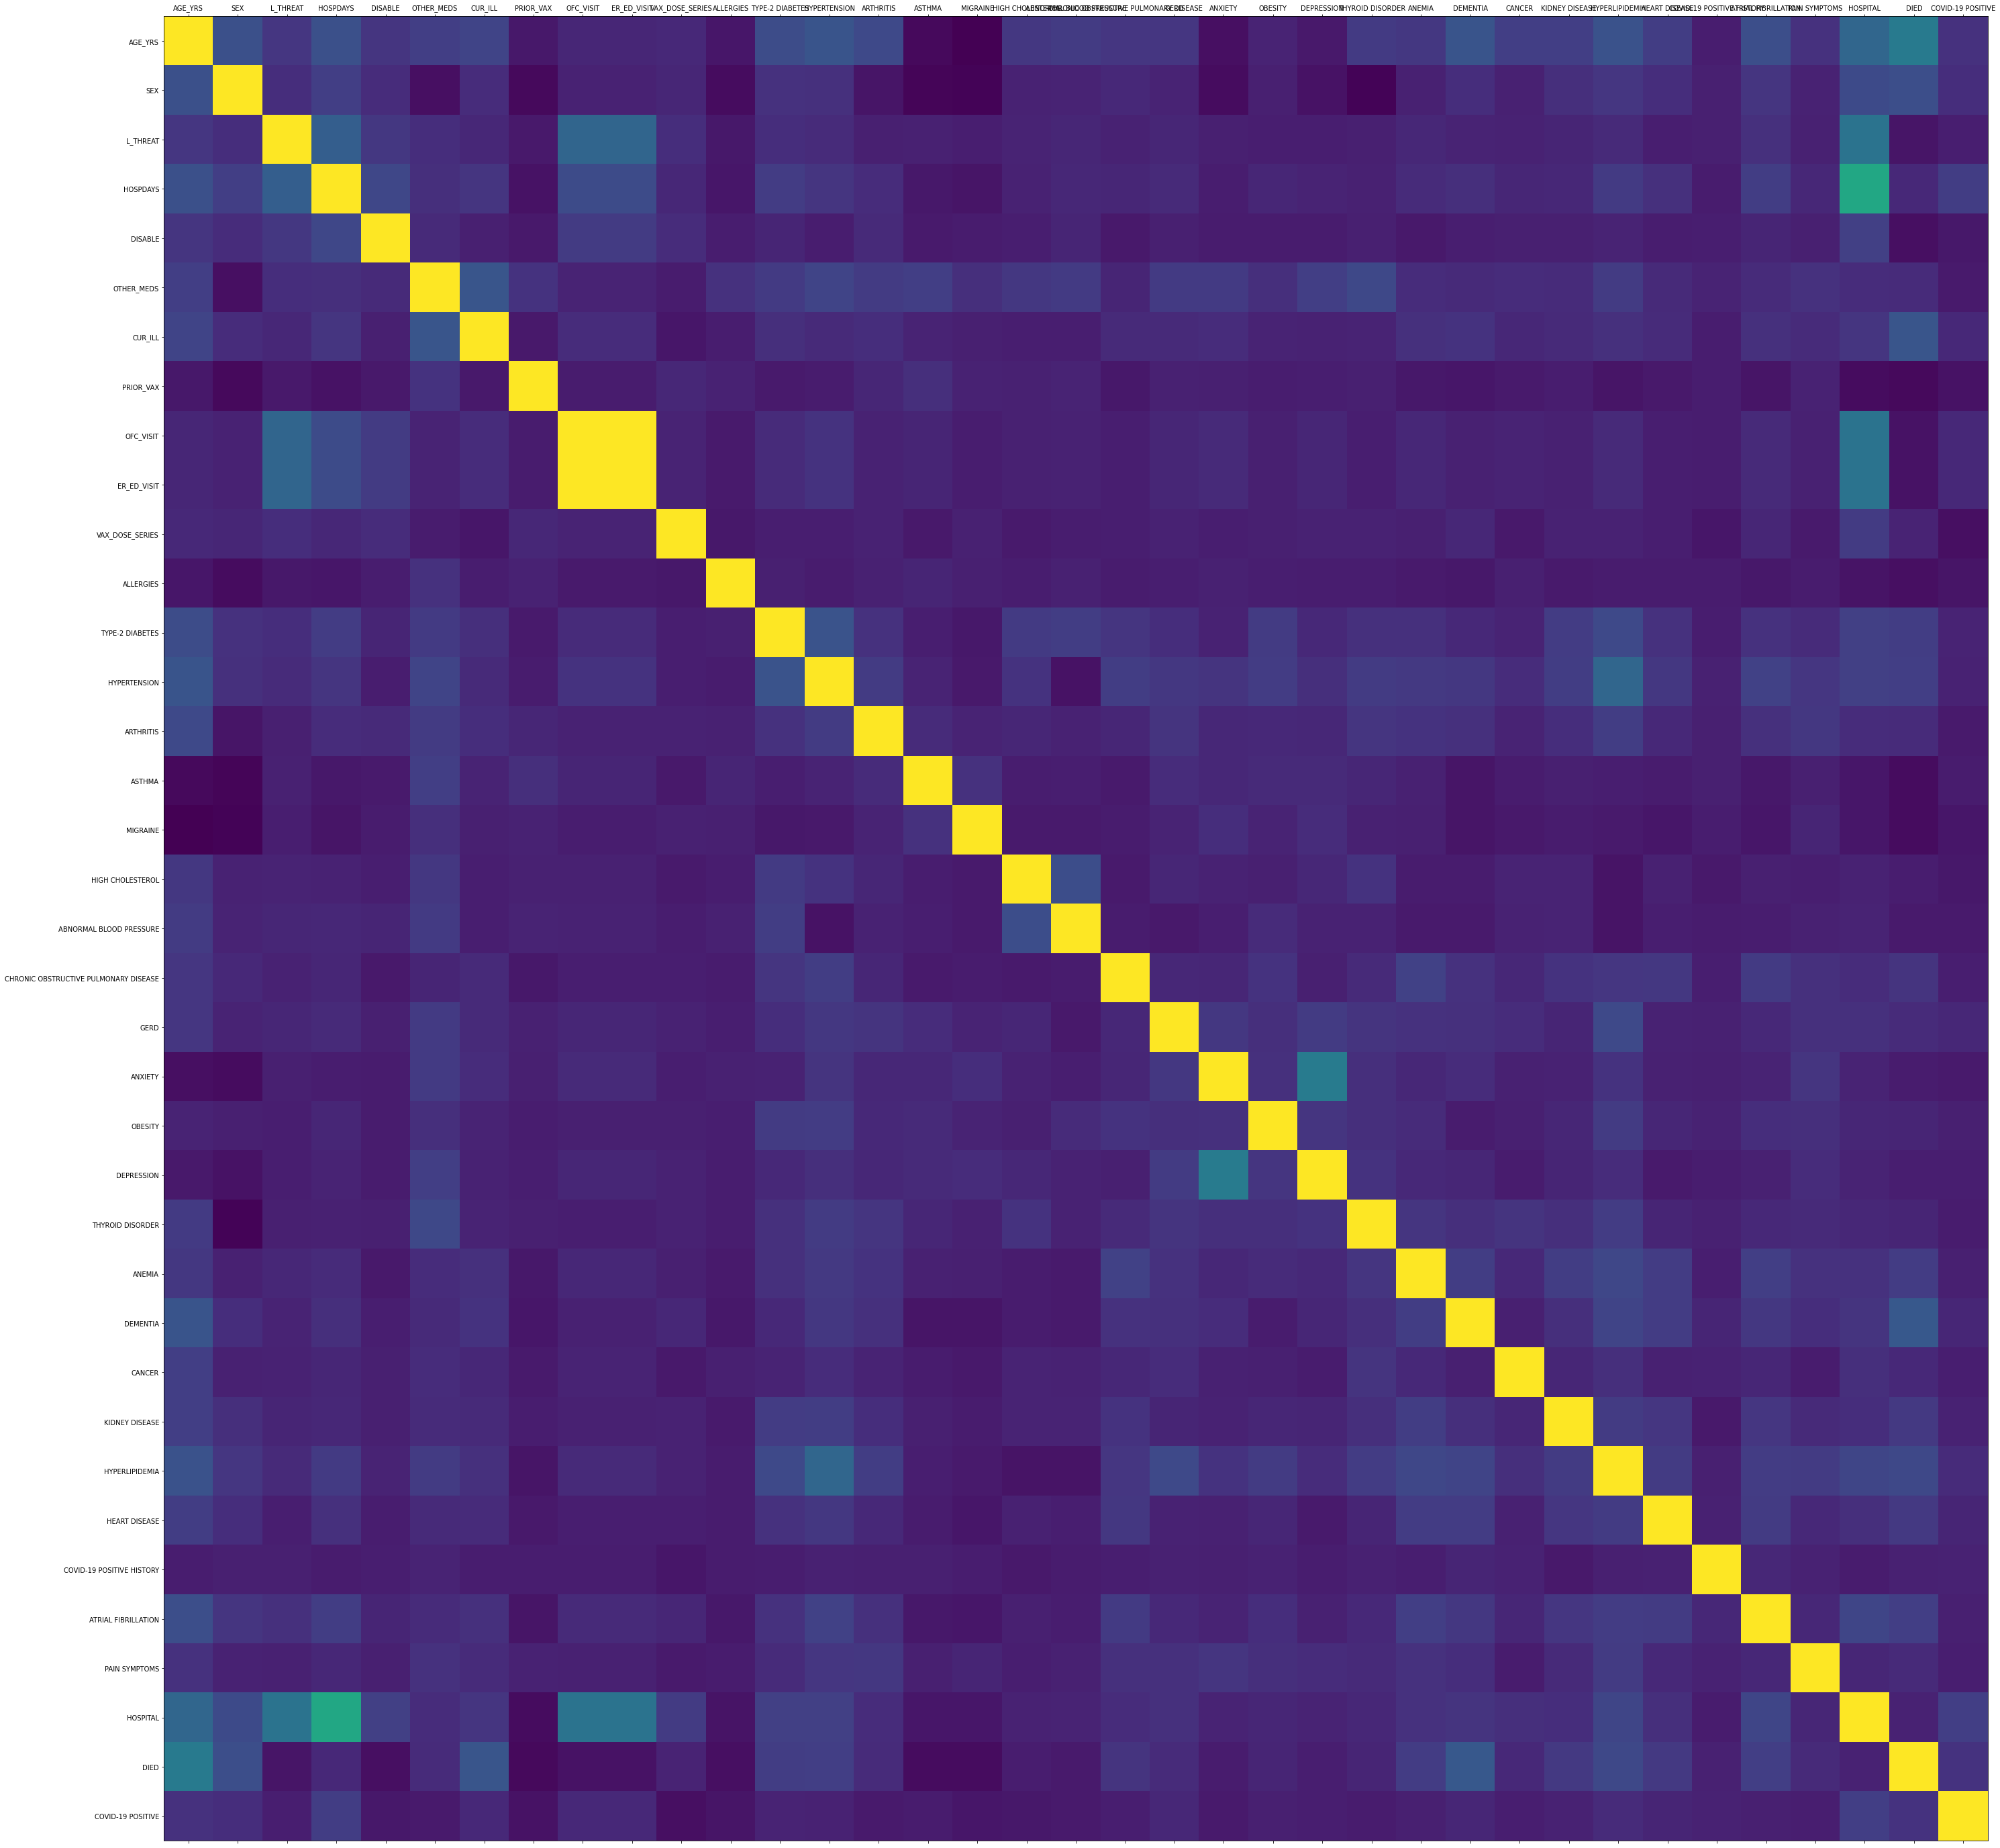

In [4]:
corr_heatmap(new_df_with_medical_history,50)

# SPLIT X AND Y VALUES FOR MEDICAL HISTORIES (HOSPITAL)

In [5]:
clm = new_df_with_medical_history.columns
feature_column_names = clm[:-3]

predicted_class_name = ['DIED']

X = new_df_with_medical_history[feature_column_names].values
y = new_df_with_medical_history[predicted_class_name].values



# SMOTING 

In [6]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE()
X, y = sm.fit_resample(X, y) 



# SPLIT THE TRAIN AND TEST DATA

In [7]:
split_test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state = 42)

print("{0:0.2f}% in training set".format((len(X_train)/len(new_df_with_medical_history.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(new_df_with_medical_history.index)) * 100))



150.97% in training set
37.75% in test set


# STANDARD SCALLING

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# APPLY MODEL

In [9]:
# evaluate bagging algorithm for classification
from numpy import mean
from sklearn.model_selection import KFold, cross_val_score
from numpy import std
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import sklearn.metrics as metrics
import sklearn.metrics as metrics
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier

from numpy import hstack
from sklearn.model_selection import KFold
from numpy import vstack
from numpy import asarray
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


C:\Users\User\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
l = [x for x in list(new_df_with_medical_history.columns) if x!= 'HOSPITAL' and x!='DIED' and x!='COVID-19 POSITIVE' ]

In [11]:

# create a list of base-models
def get_models():
	models = list()
	models.append(LogisticRegression(solver='liblinear'))
	models.append(DecisionTreeClassifier())
	models.append(SVC(gamma='scale', probability=True))
	models.append(GaussianNB())
	models.append(KNeighborsClassifier())
	models.append(AdaBoostClassifier())
	models.append(BaggingClassifier(n_estimators=10))
	models.append(RandomForestClassifier(criterion = 'gini', n_estimators = 30, random_state = 0))
	models.append(ExtraTreesClassifier(n_estimators=10))
	models.append(GradientBoostingClassifier())
	models.append(lgb.LGBMClassifier())
	models.append(XGBClassifier())
	return models


def vector_df(X,y,ALL_X):
    df_y = pd.DataFrame(y, columns=['DIED'])
    df_x = pd.DataFrame(X, columns= [ 'logic0','logic1','dt0','dt1','svc0','svc1','gnb0','gnb1','kn0','kn1','ab0','ab1','bc0','bc1','rfc0','rfc1','extc0','extc1','gbc0','gbc1','lgbm0','lgbm1','xgb0','xgb1'])
    DFX = pd.DataFrame(ALL_X, columns=l)
    abc = df_x.reset_index(drop=True)
    efg = df_y.reset_index(drop = True)
    ijk = DFX.reset_index(drop = True)
    df = pd.concat([ijk,abc,efg], axis=1)
    return df



def fit_base_model(X,y,model):
    for model in models:
        print(f"Fitted to Model: {model}\n")
        model.fit(X,y)

def evaluate_models(X, y, models):
    for model in models:
        print(f"Model: {model}\n")
        y_pred = model.predict(X)
        print ("Confusion Matrix")
        # labels for set 1=True to upper left and 0 = False to lower right
        print ("{0}".format(metrics.confusion_matrix(y, y_pred, labels=[1, 0])))
        print ("{0}".format(metrics.classification_report(y, y_pred, labels=[1, 0])))
        precision = precision_score(y, y_pred)
        recall = recall_score(y, y_pred)
        f1 = f1_score(y, y_pred)
        test_acc = metrics.accuracy_score(y, y_pred)
        auc = roc_auc_score(y, y_pred)
        logloss = log_loss(y, y_pred)
        print(f"Test Accuracies: {test_acc}\n")
        print(f"precision: {precision}\n")
        print(f"recall: {recall}\n")    
        print(f"f1: {f1}\n")
        print(f"auc: {auc}\n")
        print(f"logloss: {logloss}\n")

def fit_custom_model_rf(X,y):
    model = RandomForestClassifier(criterion = 'gini', n_estimators = 30, random_state = 0)
    model.fit(X, y)
    return model
def fit_custom_model_xgb(X,y):
    model = XGBClassifier()
    model.fit(X, y)
    return model
def fit_custom_model_gbc(X,y):
    model = GradientBoostingClassifier()
    model.fit(X, y)
    return model
def fit_custom_model_etc(X,y):
    model = ExtraTreesClassifier(n_estimators=10)
    model.fit(X, y)
    return model
def fit_custom_model_bc(X,y):
    model = BaggingClassifier(n_estimators=10)
    model.fit(X, y)
    return model
def fit_custom_model_ab(X,y):
    model = AdaBoostClassifier()
    model.fit(X, y)
    return model
def fit_custom_model_knc(X,y):
    model = KNeighborsClassifier()
    model.fit(X, y)
    return model
def fit_custom_model_gnb(X,y):
    model =GaussianNB()
    model.fit(X, y)
    return model
def fit_custom_model_svc(X,y):
    model = SVC(gamma='scale', probability=True)
    model.fit(X, y)
    return model
def fit_custom_model_dc(X,y):
    model = DecisionTreeClassifier()
    model.fit(X, y)
    return model

def fit_custom_model_lr(X,y):
    model = LogisticRegression(solver='liblinear')
    model.fit(X, y)
    return model
def fit_custom_model_lgbm(X,y):
    model = lgb.LGBMClassifier()
    model.fit(X, y)
    return model
# make predictions with stacked model
def evaluate_custom_model(X,y, models,cm):
	meta_X = list()
	for model in models:
		yhat = model.predict_proba(X)
		meta_X.append(yhat)
	meta_X = hstack(meta_X)
	meta_X = np.concatenate((X,meta_X),axis=1)
	# predict
	y_pred = cm.predict(meta_X)
	print ("Confusion Matrix")
	# labels for set 1=True to upper left and 0 = False to lower right
	print ("{0}".format(metrics.confusion_matrix(y, y_pred, labels=[1, 0])))
	print ("{0}".format(metrics.classification_report(y, y_pred, labels=[1, 0])))
	precision = precision_score(y, y_pred)
	recall = recall_score(y, y_pred)
	f1 = f1_score(y, y_pred)
	test_acc = metrics.accuracy_score(y, y_pred)
	auc = roc_auc_score(y, y_pred)
	logloss = log_loss(y, y_pred)
	print(f"Test Accuracies: {test_acc}\n")
	print(f"precision: {precision}\n")
	print(f"recall: {recall}\n")    
	print(f"f1: {f1}\n")
	print(f"auc: {auc}\n")
	print(f"logloss: {logloss}\n")

# collect out of fold predictions form k-fold cross validation
def get_out_of_fold_predictions(X, y, models):
	meta_X, meta_y,TEST_X = list(), list(),list()
	# define split of data
	kfold = KFold(n_splits=10, shuffle=True)
	# enumerate splits
	for train_ix, test_ix in kfold.split(X):
		fold_yhats = list()
		X_LIST = list()
		# get data
		train_X, test_X = X[train_ix], X[test_ix]
		train_y, test_y = y[train_ix], y[test_ix]
		meta_y.extend(test_y)
		X_LIST.append(test_X)
		# fit and make predictions with each sub-model
		for model in models:
			model.fit(train_X, train_y)
			yhat = model.predict_proba(test_X)
			# store columns
			fold_yhats.append(yhat)
		# store fold yhats as columns
		meta_X.append(hstack(fold_yhats))
		TEST_X.append(hstack(X_LIST))
	return vstack(meta_X), asarray(meta_y),vstack(TEST_X)


# FIT TRAINING DATA SET TO BASE MODEL AND CUSTOM MODEL

In [12]:
models = get_models()
# fit base model
fit_base_model(X_train,y_train,models)
# get out of fold predictions
meta_X, meta_y,test_x = get_out_of_fold_predictions(X_train, y_train, models)
# find the df
df = vector_df(meta_X, meta_y,test_x)
# find the columns of df
clm = df.columns
#extract feature column
feature_column_names = clm[:-1]
#extract target column
predicted_class_name = ['DIED']
#extract train data from custome df 
fit_x = df[feature_column_names].values
fit_y = df[predicted_class_name].values



Fitted to Model: LogisticRegression(solver='liblinear')

Fitted to Model: DecisionTreeClassifier()

Fitted to Model: SVC(probability=True)

Fitted to Model: GaussianNB()

Fitted to Model: KNeighborsClassifier()

Fitted to Model: AdaBoostClassifier()

Fitted to Model: BaggingClassifier()

Fitted to Model: RandomForestClassifier(n_estimators=30, random_state=0)

Fitted to Model: ExtraTreesClassifier(n_estimators=10)

Fitted to Model: GradientBoostingClassifier()

Fitted to Model: LGBMClassifier()

Fitted to Model: XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=

C:\Users\User\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:13:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:16:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:19:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:22:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:25:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:29:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:32:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:35:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:38:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:41:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:44:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [13]:
# fit custom model and find the custom model

m_lr = fit_custom_model_lr(fit_x,fit_y)
m_dc = fit_custom_model_dc(fit_x,fit_y)
m_svc = fit_custom_model_svc(fit_x,fit_y)
m_gnb= fit_custom_model_gnb(fit_x,fit_y)
m_knc = fit_custom_model_knc(fit_x,fit_y)
m_ab = fit_custom_model_ab(fit_x,fit_y)
m_bc = fit_custom_model_bc(fit_x,fit_y)
m_etc = fit_custom_model_etc(fit_x,fit_y)
m_gbc = fit_custom_model_gbc(fit_x,fit_y)
m_xgb = fit_custom_model_xgb(fit_x,fit_y)
m_lgbm = fit_custom_model_lgbm(fit_x,fit_y)
m_rf = fit_custom_model_rf(fit_x,fit_y)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example us

[13:46:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


# EVALUATE BASE MODEL

In [14]:

evaluate_models(X_test, y_test, models)


Model: LogisticRegression(solver='liblinear')

Confusion Matrix
[[3066  448]
 [ 497 3007]]
              precision    recall  f1-score   support

           1       0.86      0.87      0.87      3514
           0       0.87      0.86      0.86      3504

    accuracy                           0.87      7018
   macro avg       0.87      0.87      0.87      7018
weighted avg       0.87      0.87      0.87      7018

Test Accuracies: 0.8653462524935879

precision: 0.8605108055009824

recall: 0.8725099601593626

f1: 0.8664688427299704

auc: 0.8653360303079919

logloss: 4.650832301669052

Model: DecisionTreeClassifier()

Confusion Matrix
[[3345  169]
 [ 130 3374]]
              precision    recall  f1-score   support

           1       0.96      0.95      0.96      3514
           0       0.95      0.96      0.96      3504

    accuracy                           0.96      7018
   macro avg       0.96      0.96      0.96      7018
weighted avg       0.96      0.96      0.96      7018

Test 

# EVALUATE CUSTOM MODEL

In [15]:
evaluate_custom_model(X_test,y_test,models,m_lr)

Confusion Matrix
[[3423   91]
 [  86 3418]]
              precision    recall  f1-score   support

           1       0.98      0.97      0.97      3514
           0       0.97      0.98      0.97      3504

    accuracy                           0.97      7018
   macro avg       0.97      0.97      0.97      7018
weighted avg       0.97      0.97      0.97      7018

Test Accuracies: 0.9747791393559418

precision: 0.9754915930464519

recall: 0.9741035856573705

f1: 0.9747970952584367

auc: 0.9747801033309683

logloss: 0.871107464701937



In [16]:

evaluate_custom_model(X_test,y_test,models,m_dc)

Confusion Matrix
[[3397  117]
 [ 130 3374]]
              precision    recall  f1-score   support

           1       0.96      0.97      0.96      3514
           0       0.97      0.96      0.96      3504

    accuracy                           0.96      7018
   macro avg       0.96      0.96      0.96      7018
weighted avg       0.96      0.96      0.96      7018

Test Accuracies: 0.9648047876888002

precision: 0.963141480011341

recall: 0.9667046101309049

f1: 0.9649197557165174

auc: 0.9648020767549502

logloss: 1.2156143797675791



In [17]:
evaluate_custom_model(X_test,y_test,models,m_svc)

Confusion Matrix
[[3416   98]
 [  71 3433]]
              precision    recall  f1-score   support

           1       0.98      0.97      0.98      3514
           0       0.97      0.98      0.98      3504

    accuracy                           0.98      7018
   macro avg       0.98      0.98      0.98      7018
weighted avg       0.98      0.98      0.98      7018

Test Accuracies: 0.975919065260758

precision: 0.9796386578720964

recall: 0.9721115537848606

f1: 0.9758605913440938

auc: 0.9759244983536174

logloss: 0.8317341097403043



In [18]:
evaluate_custom_model(X_test,y_test,models,m_gnb)

Confusion Matrix
[[3425   89]
 [ 136 3368]]
              precision    recall  f1-score   support

           1       0.96      0.97      0.97      3514
           0       0.97      0.96      0.97      3504

    accuracy                           0.97      7018
   macro avg       0.97      0.97      0.97      7018
weighted avg       0.97      0.97      0.97      7018

Test Accuracies: 0.9679395839270447

precision: 0.9618084807638304

recall: 0.9746727376209448

f1: 0.9681978798586572

auc: 0.9679299761164085

logloss: 1.1073430370626127



In [19]:
evaluate_custom_model(X_test,y_test,models,m_knc)

Confusion Matrix
[[3431   83]
 [ 138 3366]]
              precision    recall  f1-score   support

           1       0.96      0.98      0.97      3514
           0       0.98      0.96      0.97      3504

    accuracy                           0.97      7018
   macro avg       0.97      0.97      0.97      7018
weighted avg       0.97      0.97      0.97      7018

Test Accuracies: 0.9685095468794528

precision: 0.9613337069207061

recall: 0.9763801935116676

f1: 0.9687985316956093

auc: 0.968498315933916

logloss: 1.0876574419664624



In [20]:
evaluate_custom_model(X_test,y_test,models,m_ab)

Confusion Matrix
[[3410  104]
 [  82 3422]]
              precision    recall  f1-score   support

           1       0.98      0.97      0.97      3514
           0       0.97      0.98      0.97      3504

    accuracy                           0.97      7018
   macro avg       0.97      0.97      0.97      7018
weighted avg       0.97      0.97      0.97      7018

Test Accuracies: 0.9734967227130237

precision: 0.9765177548682703

recall: 0.9704040978941377

f1: 0.9734513274336284

auc: 0.9735011357050597

logloss: 0.9154001106358891



In [21]:
evaluate_custom_model(X_test,y_test,models,m_bc)

Confusion Matrix
[[3416   98]
 [ 100 3404]]
              precision    recall  f1-score   support

           1       0.97      0.97      0.97      3514
           0       0.97      0.97      0.97      3504

    accuracy                           0.97      7018
   macro avg       0.97      0.97      0.97      7018
weighted avg       0.97      0.97      0.97      7018

Test Accuracies: 0.9717868338557993

precision: 0.9715585893060296

recall: 0.9721115537848606

f1: 0.9718349928876244

auc: 0.9717863704997362

logloss: 0.974459630369812



In [22]:
evaluate_custom_model(X_test,y_test,models,m_etc)

Confusion Matrix
[[3408  106]
 [  87 3417]]
              precision    recall  f1-score   support

           1       0.98      0.97      0.97      3514
           0       0.97      0.98      0.97      3504

    accuracy                           0.97      7018
   macro avg       0.97      0.97      0.97      7018
weighted avg       0.97      0.97      0.97      7018

Test Accuracies: 0.9724992875463095

precision: 0.975107296137339

recall: 0.9698349459305634

f1: 0.9724639748894279

auc: 0.9725030894036378

logloss: 0.94985087050359



In [23]:
evaluate_custom_model(X_test,y_test,models,m_gbc)

Confusion Matrix
[[3427   87]
 [  86 3418]]
              precision    recall  f1-score   support

           1       0.98      0.98      0.98      3514
           0       0.98      0.98      0.98      3504

    accuracy                           0.98      7018
   macro avg       0.98      0.98      0.98      7018
weighted avg       0.98      0.98      0.98      7018

Test Accuracies: 0.9753491023083499

precision: 0.9755194990037005

recall: 0.9752418895845191

f1: 0.9753806745410559

auc: 0.9753492552945425

logloss: 0.8514216417353307



In [24]:
evaluate_custom_model(X_test,y_test,models,m_xgb)

Confusion Matrix
[[3419   95]
 [ 101 3403]]
              precision    recall  f1-score   support

           1       0.97      0.97      0.97      3514
           0       0.97      0.97      0.97      3504

    accuracy                           0.97      7018
   macro avg       0.97      0.97      0.97      7018
weighted avg       0.97      0.97      0.97      7018

Test Accuracies: 0.9720718153320034

precision: 0.9713068181818182

recall: 0.972965281730222

f1: 0.9721353426215525

auc: 0.9720705404084901

logloss: 0.9646168328217368



In [25]:
evaluate_custom_model(X_test,y_test,models,m_lgbm)

Confusion Matrix
[[3420   94]
 [  92 3412]]
              precision    recall  f1-score   support

           1       0.97      0.97      0.97      3514
           0       0.97      0.97      0.97      3504

    accuracy                           0.97      7018
   macro avg       0.97      0.97      0.97      7018
weighted avg       0.97      0.97      0.97      7018

Test Accuracies: 0.9734967227130237

precision: 0.9738041002277904

recall: 0.9732498577120091

f1: 0.9735269000853971

auc: 0.973497074974726

logloss: 0.9154012499881693



In [26]:
evaluate_custom_model(X_test,y_test,models,m_rf)

Confusion Matrix
[[3417   97]
 [  97 3407]]
              precision    recall  f1-score   support

           1       0.97      0.97      0.97      3514
           0       0.97      0.97      0.97      3504

    accuracy                           0.97      7018
   macro avg       0.97      0.97      0.97      7018
weighted avg       0.97      0.97      0.97      7018

Test Accuracies: 0.9723567968082074

precision: 0.9723961297666477

recall: 0.9723961297666477

f1: 0.9723961297666477

auc: 0.9723567406824106

logloss: 0.9547734655975219

